In [123]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)

mnist = keras.datasets.mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train))

2.6.0
60000


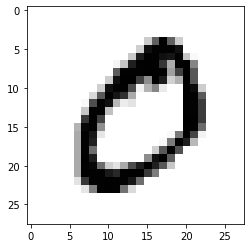

In [124]:
plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.show()

In [125]:
print(y_train[1])

0


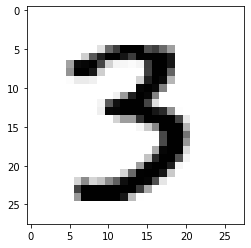

10001 번째 이미지의 숫자는 바로  3 입니다.


In [126]:
index=10000 #0에서 59999사이의 숫자를 지정해보자.
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ', y_train[index], '입니다.')

In [127]:
print(x_train.shape)

(60000, 28, 28)


In [128]:
print(x_test.shape)

(10000, 28, 28)


In [129]:
print('최솟값:', np.min(x_train), ' 최댓값:', np.max(x_train))

최솟값: 0  최댓값: 255


In [130]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최솟값:', np.min(x_train_norm), ' 최댓값:',np.max(x_train_norm))

최솟값: 0.0  최댓값: 1.0


In [131]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 layer 개수:' , len(model.layers))

Model에 추가된 layer 개수: 7


In [132]:
model.summary() #얼마나 잘 만들었는지 확인하기

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

In [135]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1) # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다
x_test_reshaped=x_test_norm.reshape(-1, 28, 28, 1) #채널수 1이라는 것은 흑백 이미지를 의미함. 컬러 이미지는 R,G,B라서 3이 될 것.

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))




Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [136]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2127 - accuracy: 0.9358
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0767 - accuracy: 0.9764
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0539 - accuracy: 0.9838
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0425 - accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0340 - accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0288 - accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0237 - accuracy: 0.9928
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0198 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0168 - accuracy: 0.9946
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.014

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7efd919fc280>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/tensorflow/python/data/ops/iterator_ops.py", line 545, in __del__
    gen_dataset_ops.delete_iterator(
  File "/opt/conda/lib/python3.9/site-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1263, in delete_iterator
    _result = pywrap_tfe.TFE_Py_FastPathExecute(
KeyboardInterrupt: 


# 1-5 얼마나 잘 만들었는지 확인하기 

테스트 데이터로 성능 확인하기

학습용 데이터 x_train
시험용 데이터 x_test

In [142]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {}".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0409 - accuracy: 0.9888
test_loss: 0.040851280093193054
test_accuracy: 0.9887999892234802


In [143]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1) #

idx=0 # first x_test 살펴보기
print('model.predic() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predic() 결과 :  [2.4673075e-10 2.2682782e-10 3.8873193e-07 8.0406180e-06 5.0296482e-11
 3.0423073e-12 4.6322343e-13 9.9999154e-01 3.5929115e-10 2.4502814e-08]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


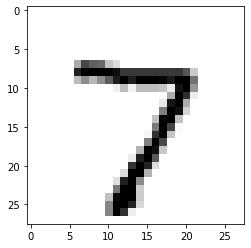

In [144]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [4.4203195e-01 2.4216368e-08 1.2849375e-04 7.5109838e-08 3.9242089e-01
 2.7636517e-07 1.4642522e-01 9.9547974e-11 1.8907387e-02 8.5763044e-05]
라벨: 4, 예측결과: 0


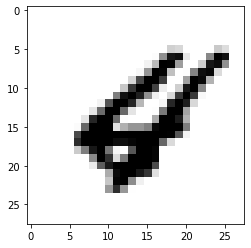

예측확률분포: [2.4282875e-07 1.4879857e-10 2.1406969e-07 3.0980225e-11 6.6153616e-02
 5.5348254e-10 1.3998772e-04 5.4057558e-10 9.3370557e-01 2.8603048e-07]
라벨: 4, 예측결과: 8


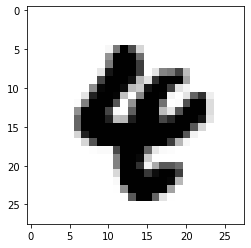

예측확률분포: [2.4869337e-10 6.9888012e-10 2.5234979e-13 1.0224614e-10 3.8381126e-02
 3.9892602e-06 4.8231107e-07 1.0640309e-11 3.3881931e-06 9.6161091e-01]
라벨: 4, 예측결과: 9


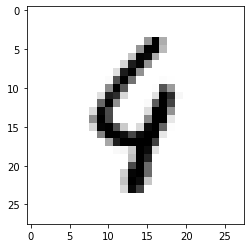

예측확률분포: [7.6554126e-01 1.7810727e-13 2.2898588e-01 1.5920201e-11 5.9924368e-08
 6.8397931e-08 2.3142786e-03 1.6128970e-13 3.1502880e-03 8.1263843e-06]
라벨: 2, 예측결과: 0


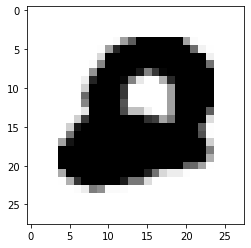

예측확률분포: [5.44779186e-06 1.41195356e-12 1.08541556e-07 1.99539736e-01
 1.12997660e-10 7.32217683e-04 3.27619478e-06 1.10959922e-10
 7.83476174e-01 1.62431039e-02]
라벨: 3, 예측결과: 8


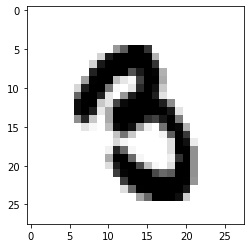

In [145]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [146]:
# 변경 가능한 하이퍼 파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

# 가위바위보

In [147]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")


PIL 라이브러리 import 완료!


In [148]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size = (28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")



3000  images to be resized.
3000  images resized.
가위 이미지 resize 완료!


In [149]:

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock/rock"
resize_images(image_dir_path)


2928  images to be resized.
2928  images resized.


In [150]:
 
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper/paper"
resize_images(image_dir_path)


2896  images to be resized.
2896  images resized.


In [151]:
import numpy as np

import os

def load_data(img_path,number_of_data=8824):
    img_size=28
    color = 3
    imgs = np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size, color)
    labels = np.zeros(number_of_data,dtype=np.int32)
    
    idx=0
    for file in glob.iglob(img_path+'/scissor/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=0
        idx=idx+1
        
        
    for file in glob.iglob(img_path+'/rock/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=1
        idx=idx+1
        
    for file in glob.iglob(img_path+'/paper/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))



학습데이터(x_train)의 이미지 개수는 8824 입니다.
x_train shape: (8824, 28, 28, 3)
y_train shape: (8824,)


라벨:  0


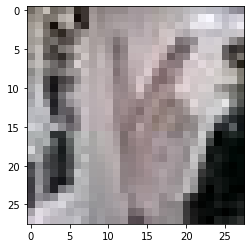

In [152]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

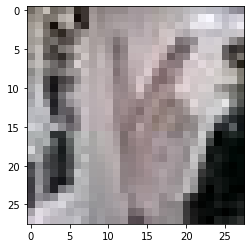

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_61 (Dense)             (None, 10)              

In [308]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

model.summary()

In [310]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
276/276 [==============================] - 1s 3ms/step - loss: 0.9347 - accuracy: 0.5566
Epoch 2/10
276/276 [==============================] - 1s 3ms/step - loss: 0.4400 - accuracy: 0.8395
Epoch 3/10
276/276 [==============================] - 1s 3ms/step - loss: 0.2624 - accuracy: 0.9130
Epoch 4/10
276/276 [==============================] - 1s 3ms/step - loss: 0.1720 - accuracy: 0.9457
Epoch 5/10
276/276 [==============================] - 1s 3ms/step - loss: 0.1171 - accuracy: 0.9626
Epoch 6/10
276/276 [==============================] - 1s 3ms/step - loss: 0.0844 - accuracy: 0.9747
Epoch 7/10
276/276 [==============================] - 1s 3ms/step - loss: 0.0648 - accuracy: 0.9813
Epoch 8/10
276/276 [==============================] - 1s 3ms/step - loss: 0.0481 - accuracy: 0.9866
Epoch 9/10
276/276 [==============================] - 1s 3ms/step - loss: 0.0398 - accuracy: 0.9889
Epoch 10/10
276/276 [==============================] - 1s 3ms/step - loss: 0.0312 - accuracy: 0.9916

In [320]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size = (28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")


100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [321]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size = (28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [322]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size = (28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [324]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_train.shape))
print("y_test shape: {}".format(y_train.shape))

테스트(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [327]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.7878 - accuracy: 0.9933
test_loss: 0.7877795100212097 
test_accuracy: 0.9933333396911621
